In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
# Leicester city centre coordinates (same as in fetch_data.py)
lat = 52.629729
lng = -1.131592

url = "https://data.police.uk/api/crimes-street/all-crime"
params = {"lat": lat, "lng": lng}

response = requests.get(url, params=params)
response.raise_for_status()
data = response.json()

len(data)

1477

In [3]:
records = []
for r in data:
    loc = r.get("location") or {}
    row = {
        "category": r.get("category"),
        "month": r.get("month"),
        "latitude": float(loc.get("latitude")) if loc.get("latitude") else None,
        "longitude": float(loc.get("longitude")) if loc.get("longitude") else None,
        "street_name": (loc.get("street") or {}).get("name"),
        "crime_id": r.get("id"),
        "outcome_status": (r.get("outcome_status") or {}).get("category"),
    }
    records.append(row)

df = pd.DataFrame(records)
df.head()

,category,month,latitude,longitude,street_name,crime_id,outcome_status
0,anti-social-behaviour,2025-09,52.635797,-1.131926,On or near Fox Lane,131032513,None
1,anti-social-behaviour,2025-09,52.620909,-1.116031,On or near St Marys Road,131033113,None
2,anti-social-behaviour,2025-09,52.629772,-1.132917,On or near Parking Area,131032608,None
3,anti-social-behaviour,2025-09,52.621821,-1.138165,On or near Sports/recreation Area,131033114,None
4,anti-social-behaviour,2025-09,52.632534,-1.133232,On or near Market Street,131033115,None


In [4]:
print("Rows:", len(df))
print("\nColumns:", df.columns.tolist())

print("\nCrimes per category:")
print(df["category"].value_counts().head(10))

print("\nCrimes per month:")
print(df["month"].value_counts().sort_index())

Rows: 1477

Columns: ['category', 'month', 'latitude', 'longitude', 'street_name', 'crime_id', 'outcome_status']

Crimes per category:
category
violent-crime            409
anti-social-behaviour    198
public-order             178
shoplifting              145
vehicle-crime            114
criminal-damage-arson    109
other-theft              104
drugs                     69
burglary                  46
robbery                   29
Name: count, dtype: int64

Crimes per month:
month
2025-09    1477
Name: count, dtype: int64


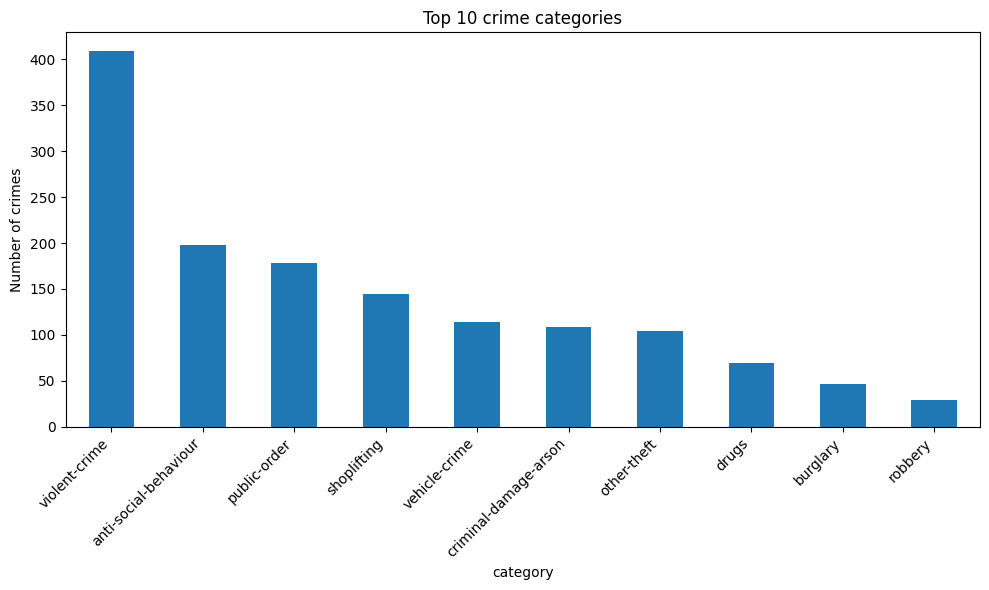

In [5]:
category_counts = df["category"].value_counts().head(10)

category_counts.plot(kind="bar")
plt.title("Top 10 crime categories")
plt.ylabel("Number of crimes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

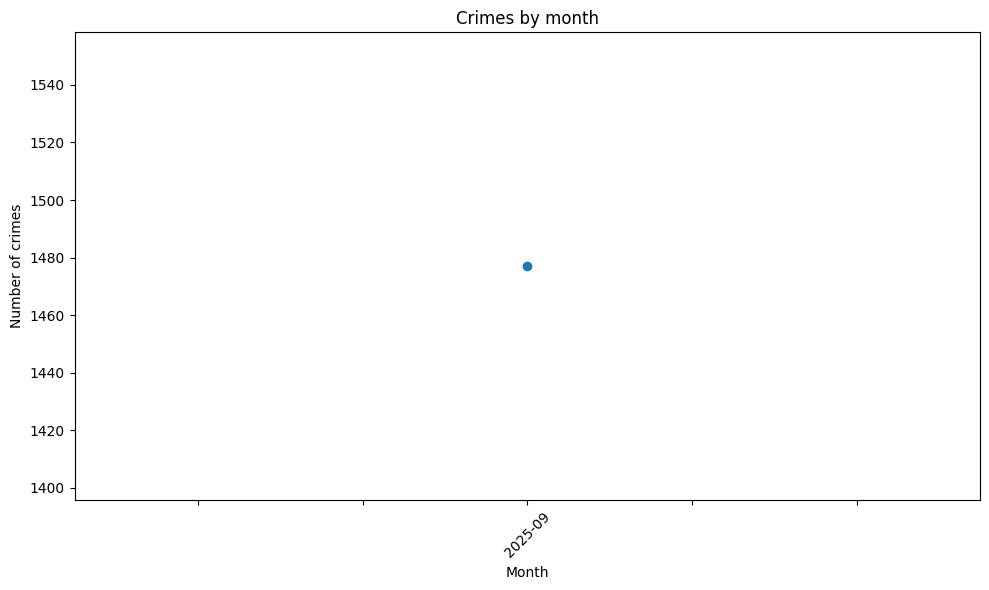

In [6]:
month_counts = df["month"].value_counts().sort_index()

month_counts.plot(marker="o")
plt.title("Crimes by month")
plt.ylabel("Number of crimes")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

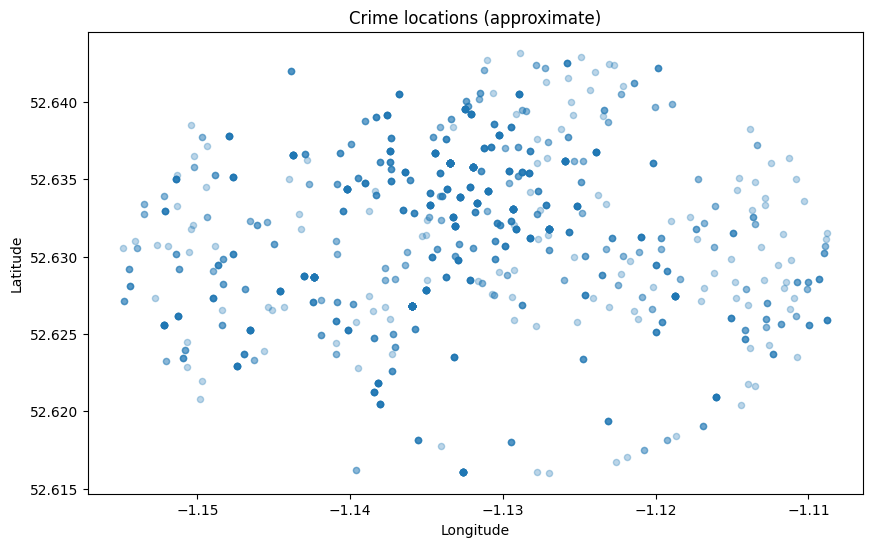

In [7]:
df.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.3,
)
plt.title("Crime locations (approximate)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()